In [1]:
#importing the libraries
import numpy as np
import pandas as pd

#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
pip install seaborn matplotlib

#importing sklearn modules required for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Performing Data Cleaning/Preprocessing 
This involve steps like:-

Removal of Unnamed Column(s)
Column(s) Renaming
Checking the correct data type(s) of the respective column(s)
Finding empty instance(s) and filling them with suitable statistical aspect(s)

In [2]:
# Read the csv file into a Pandas DataFrame
Google_ratings = pd.read_csv('google_review_ratings.csv')


In [3]:
##preview the dataset
Google_ratings.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
#Check for missing values in each column
Google_ratings.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [5]:
#Unnamed: 25 column will be dropped as it will not positively impact the model
Google_ratings.drop(['Unnamed: 25'], axis=1, inplace=True)

In [6]:
#Rows with missing values will also be dropped since it minute and can be ignored
Google_ratings = Google_ratings.dropna()

In [7]:
#Check for missing values in each column
Google_ratings.isnull().sum()

User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [8]:
#Rename the columns for easier identification
Google_ratings.columns = ['User','churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 
                'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 
                'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 
                'cafes', 'view_points', 'monuments', 'gardens']


In [9]:
#check datatype of in each column
Google_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User                   5454 non-null   object 
 1   churches               5454 non-null   float64
 2   resorts                5454 non-null   float64
 3   beaches                5454 non-null   float64
 4   parks                  5454 non-null   float64
 5   theatres               5454 non-null   float64
 6   museums                5454 non-null   float64
 7   malls                  5454 non-null   float64
 8   zoo                    5454 non-null   float64
 9   restaurants            5454 non-null   float64
 10  pubs_bars              5454 non-null   float64
 11  local_services         5454 non-null   object 
 12  burger_pizza_shops     5454 non-null   float64
 13  hotels_other_lodgings  5454 non-null   float64
 14  juice_bars             5454 non-null   float64
 15  art_galle

In [10]:
#convert column 'Category 11' to float64
Google_ratings['local_services'] = pd.to_numeric(Google_ratings['local_services'], errors='coerce')

In [11]:
#check again
Google_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User                   5454 non-null   object 
 1   churches               5454 non-null   float64
 2   resorts                5454 non-null   float64
 3   beaches                5454 non-null   float64
 4   parks                  5454 non-null   float64
 5   theatres               5454 non-null   float64
 6   museums                5454 non-null   float64
 7   malls                  5454 non-null   float64
 8   zoo                    5454 non-null   float64
 9   restaurants            5454 non-null   float64
 10  pubs_bars              5454 non-null   float64
 11  local_services         5454 non-null   float64
 12  burger_pizza_shops     5454 non-null   float64
 13  hotels_other_lodgings  5454 non-null   float64
 14  juice_bars             5454 non-null   float64
 15  art_galle

In [12]:
Google_ratings.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,...,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,...,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Exploratory Data Analysis

import warnings
warnings.filterwarnings('ignore')

boxplot = sns.pairplot(Google_ratings)


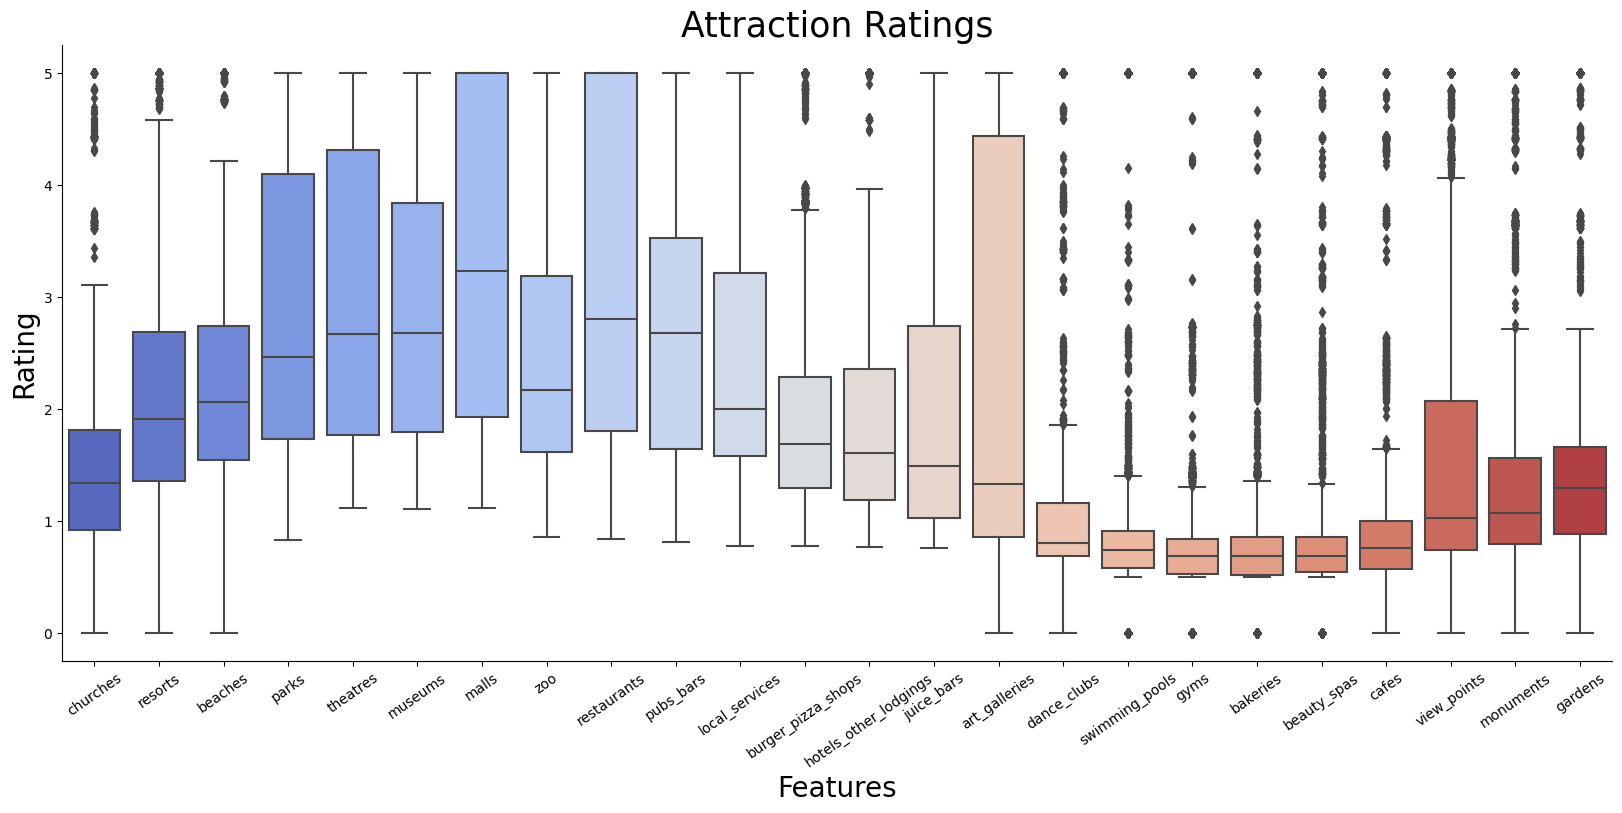

In [13]:
#Boxplot showing the outliers
boxplot = plt.subplots(figsize=(20, 8))

boxplot = sns.boxplot(data= Google_ratings, palette="coolwarm")

sns.despine()
boxplot.set_xlabel('Features', fontsize = 20)
boxplot.set_ylabel('Rating', fontsize = 20)
boxplot.set_title('Attraction Ratings', fontsize = 25)

plt.xticks(rotation= 35)
plt.show()

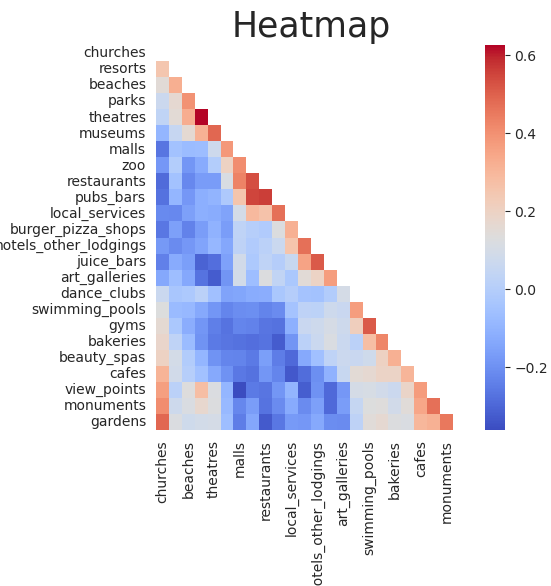

In [14]:
#Check pearson's correlation between variables
# Exclude the first column from the correlation matrix
corr_subset = Google_ratings.iloc[:, 1:].corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr_subset)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
with sns.axes_style("white"):
    f, htmp = plt.subplots(figsize=(5, 5))
    htmp = sns.heatmap(corr_subset, mask=mask, cmap='coolwarm')

htmp.set_title('Heatmap', fontsize=25)
plt.show()


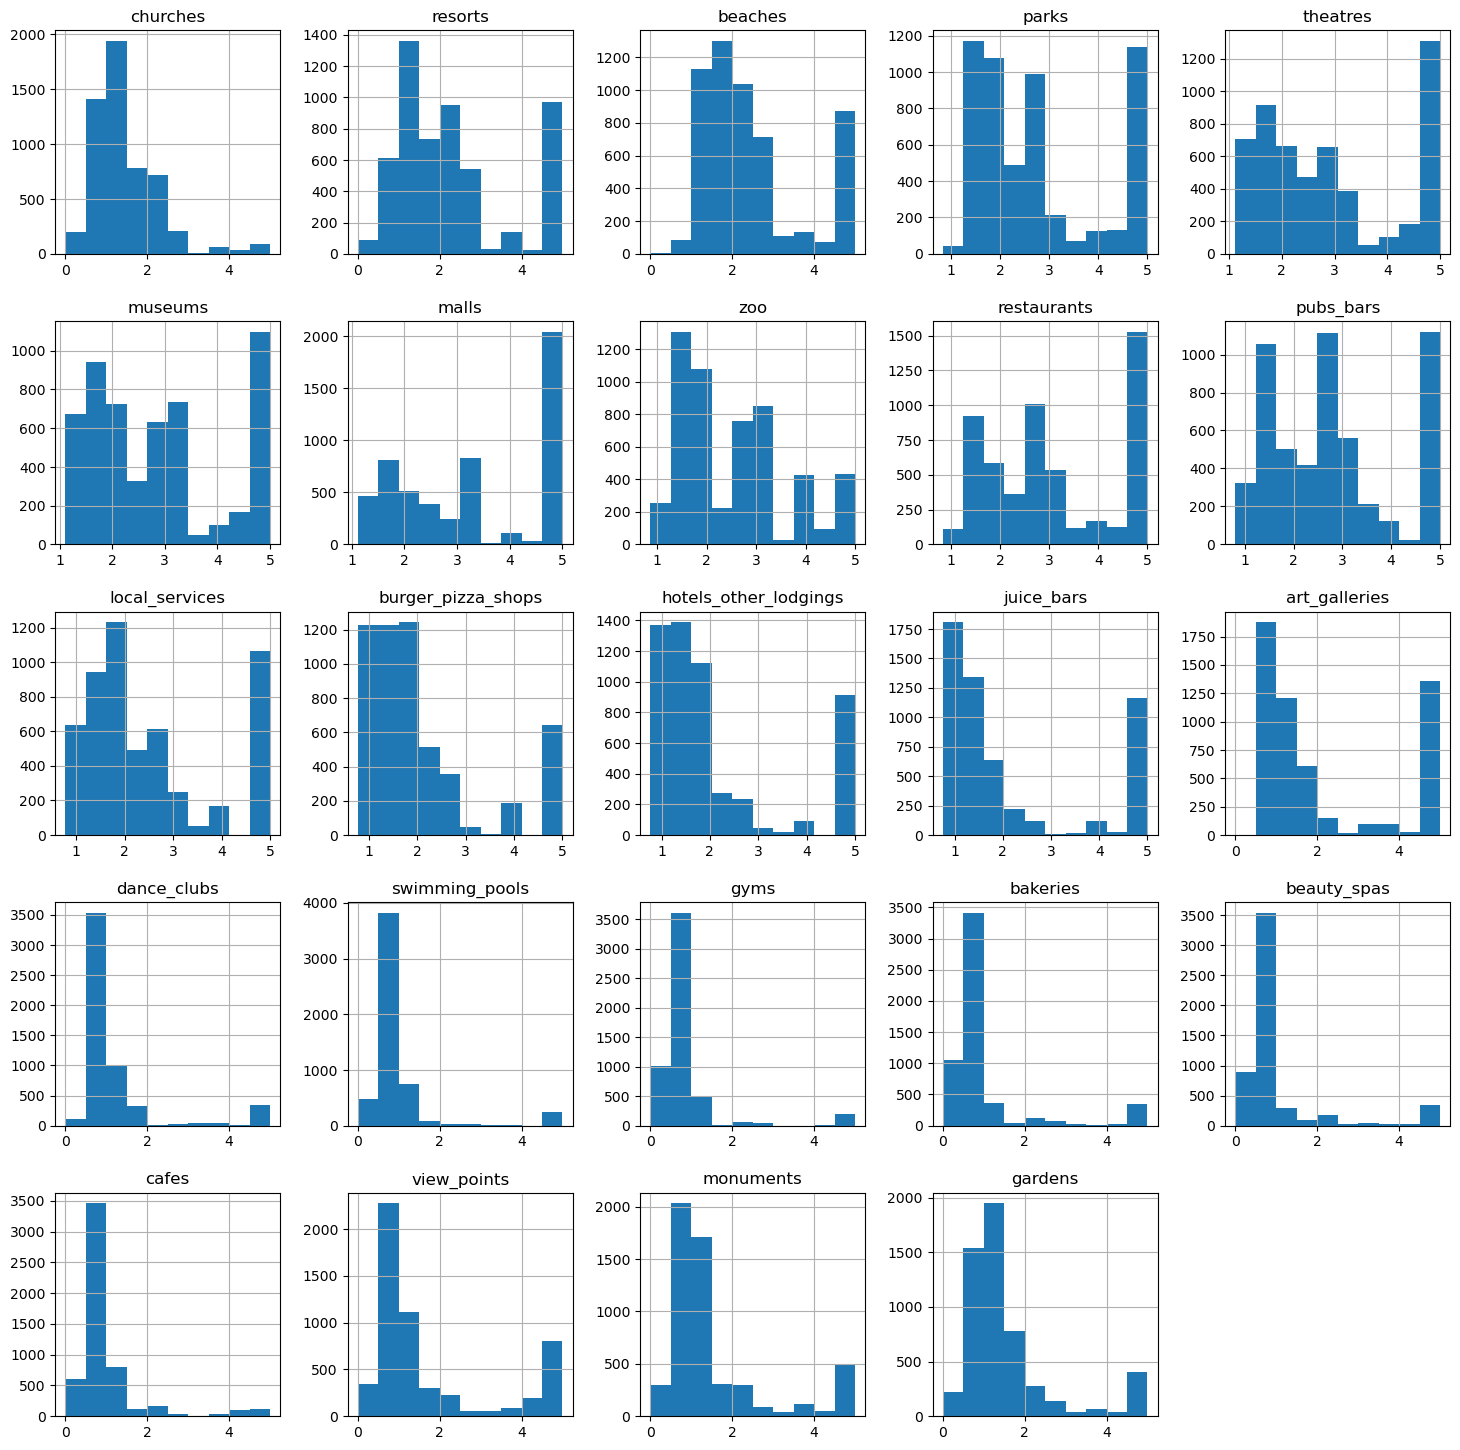

In [15]:
fig = Google_ratings.hist(figsize = (18,18))

In [16]:
#Analysis of the total rating as a whole
#Create a dataframe of all the ratings as a whole
melted_ratings = pd.melt(Google_ratings)
melted_ratings

,variable,value
0,User,User 1
1,User,User 2
2,User,User 3
3,User,User 4
4,User,User 5
...,...,...
136345,gardens,1.56
136346,gardens,1.09
136347,gardens,1.11
136348,gardens,1.12


In [17]:
#view the new melted dataframe
melted_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136350 entries, 0 to 136349
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   variable  136350 non-null  object
 1   value     136350 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [19]:
#Scaling 
from sklearn.preprocessing import StandardScaler
X = Google_ratings.iloc[:, 1:24].values
Scaled_X = StandardScaler()
Google_ratings_scaled = Scaled_X.fit_transform(X)

# Clustering
For the purpose of clustering we have decided to go with:-

KMean Clustering
Hierarhical Clustering
Observe carefully how we carry the task, keeping every attribute(s) or feature(s) which gives us the best result


# KMean Clustering
We start with KMean Clustering, with determining the pefect number of clusters with the Elbow Method with Within-Cluster-Sum-of-Squares (WCSS), which is applied followes:-

In [20]:
#reduce the dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components = 9)
Google_ratings_reduced = pca.fit_transform(Google_ratings_scaled)

pca.explained_variance_ratio_

array([0.19297918, 0.15148123, 0.07969789, 0.06827854, 0.05420213,
       0.04710366, 0.04618362, 0.04015299, 0.03336955])

In [21]:
sum(pca.explained_variance_ratio_)

0.7134488052351003

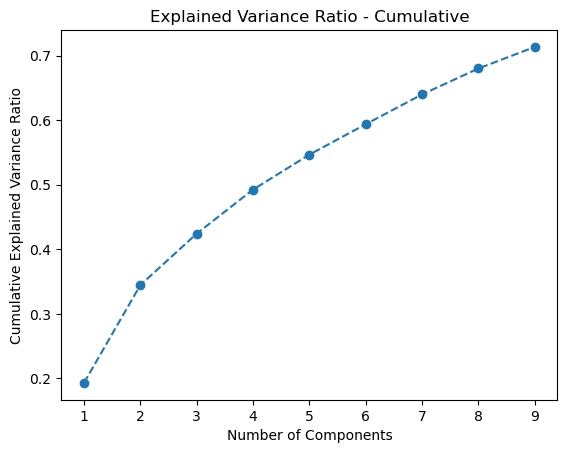

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio - Cumulative')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


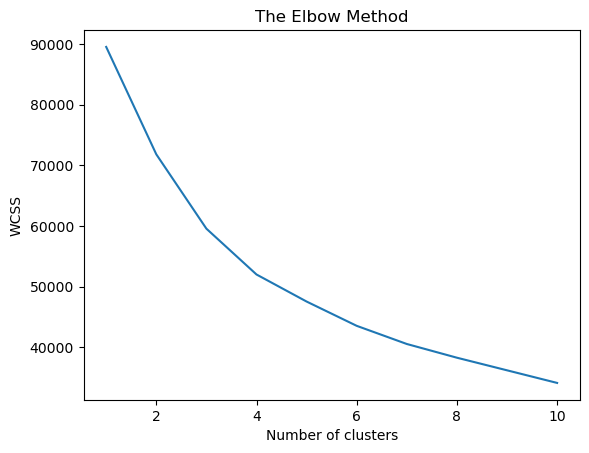

In [23]:
import warnings
warnings.filterwarnings('ignore')

#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =  i, init = 'k-means++', random_state = 0)
    kmeans.fit(Google_ratings_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
#fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
Kmeans_clusters = kmeans.fit_predict(Google_ratings_reduced)

# Accessing the cluster labels
cluster_labels = kmeans.labels_

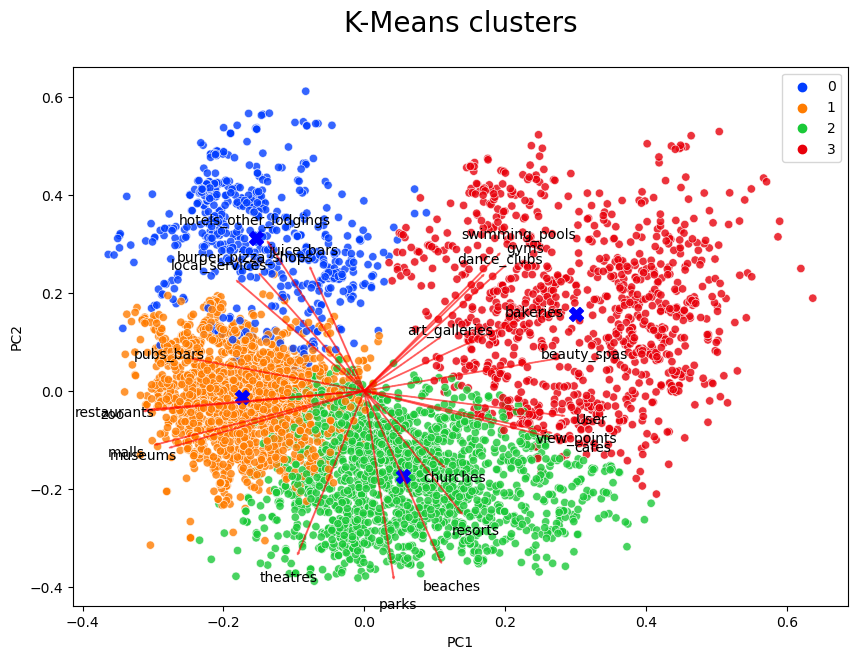

In [26]:
#define the necessary variables
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(Google_ratings.columns)

xs = Google_ratings_reduced[:,0]
ys = Google_ratings_reduced[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(10,7))

# create scatter plot of each data point
g = sns.scatterplot(x=xs * scalex, y=ys * scaley, hue=cluster_labels, palette='bright', alpha=0.8)

# Add cluster centroid
plt.scatter(x=kmeans.cluster_centers_[:,0]*scalex, y=kmeans.cluster_centers_[:,1]*scaley, color='b', s=100, marker='X')

# Add Eigenvector representing how each attraction category is related to PC1 and PC2
for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
    
      #select label colour
    plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, labels[i], color='black', ha='center', va='center')

g.set_xlabel("PC{}".format(1))
g.set_ylabel("PC{}".format(2))
g.set_title('K-Means clusters', y=1.05, fontsize=20)
plt.show()


In [27]:
#Evaluate the k-means model using silhouette_score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Google_ratings_reduced, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.21927131522304485


# hierachical clustering

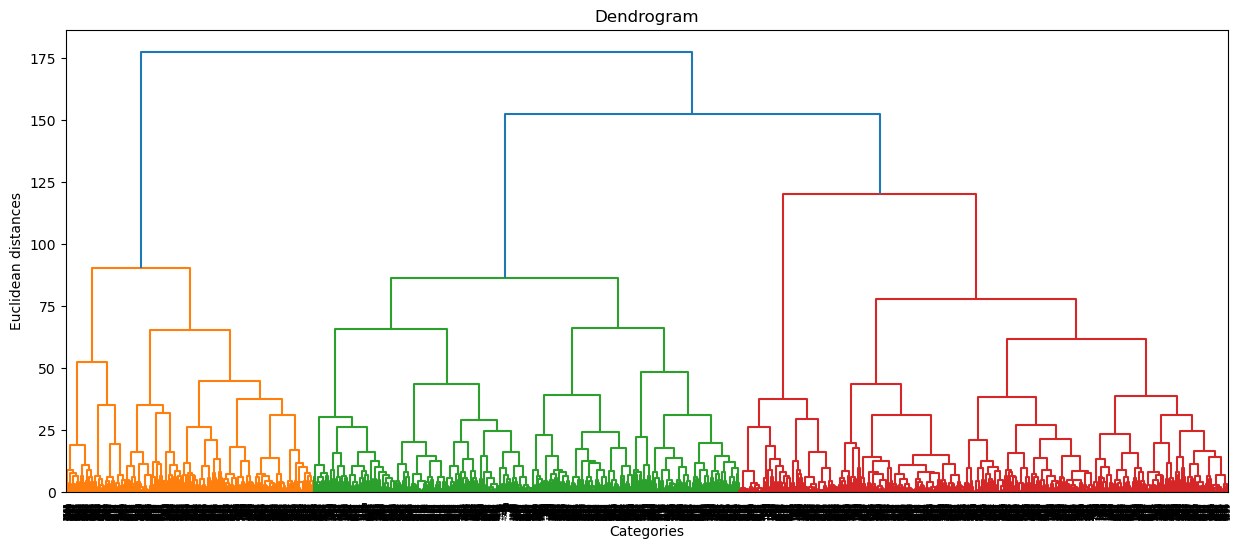

In [28]:
#using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize= (15,6))
dendrogram = sch.dendrogram(sch.linkage(Google_ratings_reduced, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Categories')
plt.ylabel('Euclidean distances')
plt.show()

In [29]:
#fitting hierachical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(Google_ratings_reduced)

# Accessing the cluster labels
hc_cluster_labels = hc.labels_

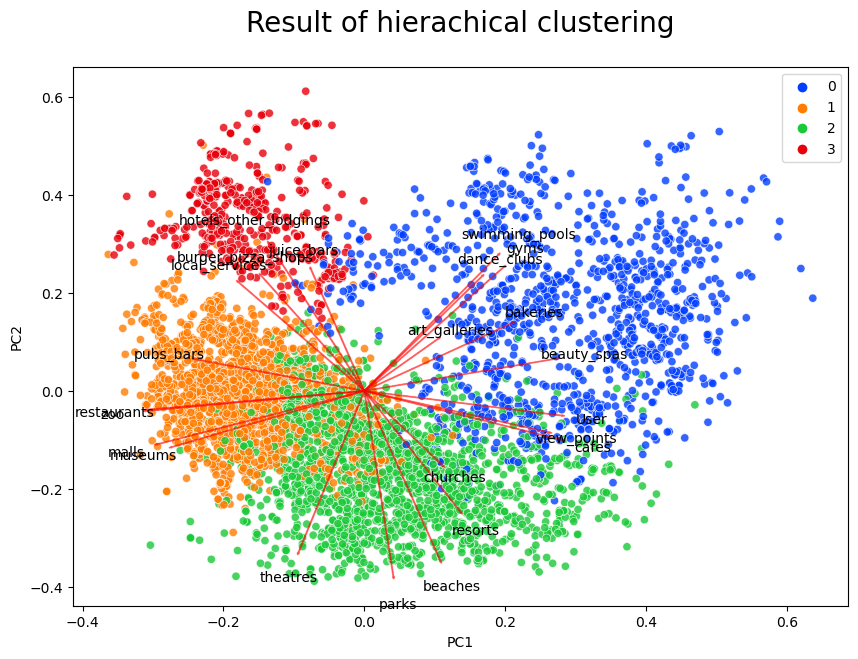

In [30]:
#define the necessary variables
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(Google_ratings.columns)

xs = Google_ratings_reduced[:,0]
ys = Google_ratings_reduced[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(10,7))

# Scatter plot of each data point
g = sns.scatterplot(x=xs * scalex, y=ys * scaley, hue=hc_cluster_labels, palette='bright', alpha=0.8)

# Calculate cluster centers (mean of data points in each cluster)
cluster_centers = np.array([X[hc_clusters == i].mean(axis=0) for i in range(4)])

# Add Eigenvector representing how each attraction category is related to PC1 and PC2
for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
    
    #select label colour
    plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, labels[i], color='black', ha='center', va='center')

g.set_xlabel("PC{}".format(1))
g.set_ylabel("PC{}".format(2))
g.set_title('Result of hierachical clustering', y=1.05, fontsize=20)
plt.show()


In [31]:
#Evaluate the Hierachical model
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Google_ratings_reduced, hc.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18972532104900347
